In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Imports

In [2]:
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=200)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# import other libraries
import random

## 2. Read in Data

In [3]:
!ls ../data/hapt_data_set/RawData | grep acc | head -3

acc_exp01_user01.txt
acc_exp02_user01.txt
acc_exp03_user02.txt


In [5]:
%%time
root = '../data/hapt_data_set/RawData/'
acc = pd.read_table(root + 'acc_exp01_user01.txt', sep=' ', header=None, names=['x', 'y', 'z'])

CPU times: user 8 ms, sys: 8 ms, total: 16 ms
Wall time: 13.5 ms


In [24]:
with open('../data/hapt_data_set/RawData/labels.txt', 'r') as f:
    labels = f.readlines()
    labels = [l.rstrip() for l in labels]

In [29]:
labels = labels[:22]

## 3. Plot Acceleration Data
* The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
* The time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.
* Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise.
* Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.

### 3.0 Plot raw acceleration (50Hz)
* The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
* The time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.

1 WALKING             
2 WALKING_UPSTAIRS  
3 WALKING_DOWNSTAIRS  
4 SITTING           
5 STANDING          
6 LAYING            
7 STAND_TO_SIT      
8 SIT_TO_STAND      
9 SIT_TO_LIE        
10 LIE_TO_SIT        
11 STAND_TO_LIE      
12 LIE_TO_STAND      


In [31]:
labels

['1 1 5 250 1232',
 '1 1 7 1233 1392',
 '1 1 4 1393 2194',
 '1 1 8 2195 2359',
 '1 1 5 2360 3374',
 '1 1 11 3375 3662',
 '1 1 6 3663 4538',
 '1 1 10 4539 4735',
 '1 1 4 4736 5667',
 '1 1 9 5668 5859',
 '1 1 6 5860 6786',
 '1 1 12 6787 6977',
 '1 1 1 7496 8078',
 '1 1 1 8356 9250',
 '1 1 1 9657 10567',
 '1 1 1 10750 11714',
 '1 1 3 13191 13846',
 '1 1 2 14069 14699',
 '1 1 3 14869 15492',
 '1 1 2 15712 16377',
 '1 1 3 16530 17153',
 '1 1 2 17298 17970']

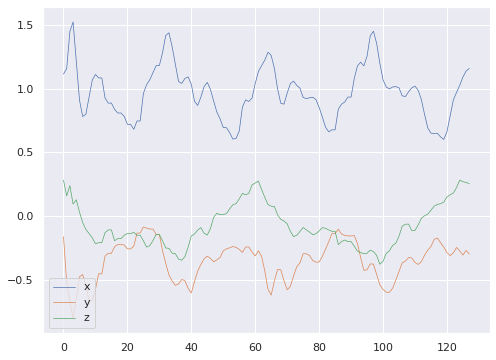

In [41]:
# WALKING_UPSTAIRS  
s = 16112
df = acc[s:s+128]

f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(df[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')
plt.show()

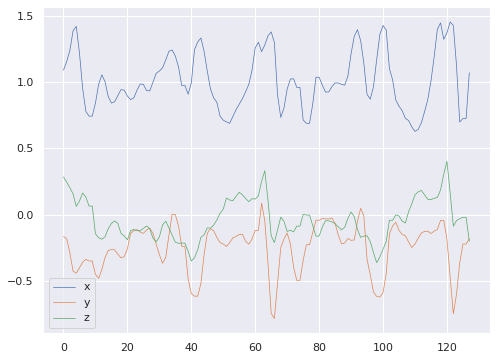

In [44]:
# walking
s = 8356
df = acc[s:s+128]

f, ax = plt.subplots(figsize=(8, 6))

for axis in ['x', 'y', 'z']:
    ax.plot(df[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')
plt.show()

### 3.1 Remove noise by filtering
* Then they were filtered using a median filter
* Median filter was applied with filter length of 5 in both acceleration and gyroscope data.

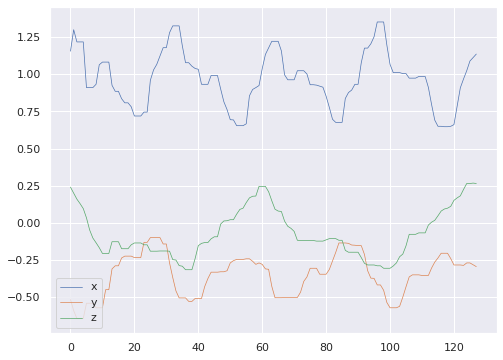

In [45]:
# Apply median filter with filter length 5.
# WALKING_UPSTAIRS  
s = 16112
df = acc[s:s+128]

df = df.rolling(window=5, center=True, min_periods=1).median()

f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(df[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')
plt.show()

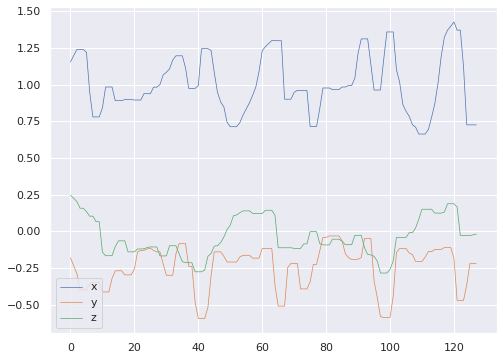

In [46]:
# Apply median filter with filter length 5.
# walking
s = 8356
df = acc[s:s+128]

df = df.rolling(window=5, center=True, min_periods=1).median()

f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(df[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')
plt.show()

### 3.2 Separate acceleration signal into body and gravity acceleratin signals
* The acceleration signal was separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.

In [ ]:
from scipy import signal
fs = 50  # sampling frequency
fc = 0.3  # cutoff frequency
w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

for axis in ['x','y','z']:   
    acc_arr = df[axis].values
    df[axis] = signal.filtfilt(b, a, acc_arr)

In [48]:
from scipy import signal, stats

In [49]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 0.3 Hz.
fs = 50  # sampling frequency
fc = 0.3  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

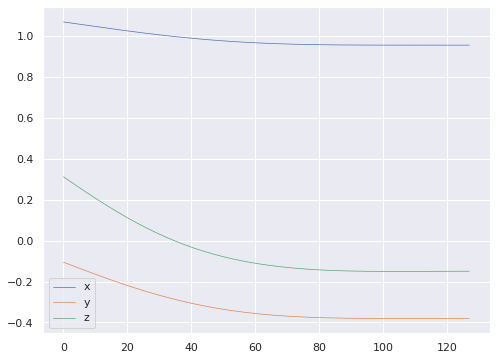

In [50]:
# WALKING_UPSTAIRS  
s = 16112
df = acc[s:s+128]

df = pd.DataFrame(columns=['x', 'y', 'z'])

for axis in ['x','y','z']:   
    acc_arr = df[axis].values
    bw_grav[axis] = signal.filtfilt(b, a, acc_arr)


f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(bw_grav[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')
plt.show()

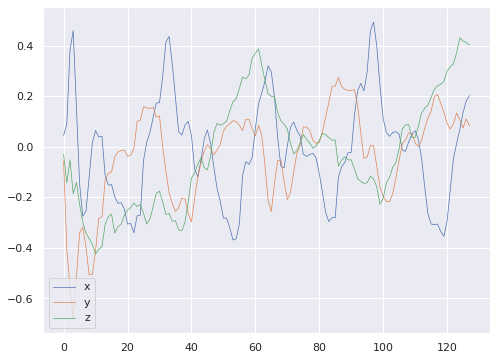

In [65]:
# Substract gravity acceleration from denoised acceleration sigal.
bw_body = df.reset_index(drop=True) - bw_grav

f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(bw_body[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')
plt.show()

## windowごとにseparate

In [20]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 0.3 Hz.
fs = 50  # sampling frequency
fc = 0.3  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

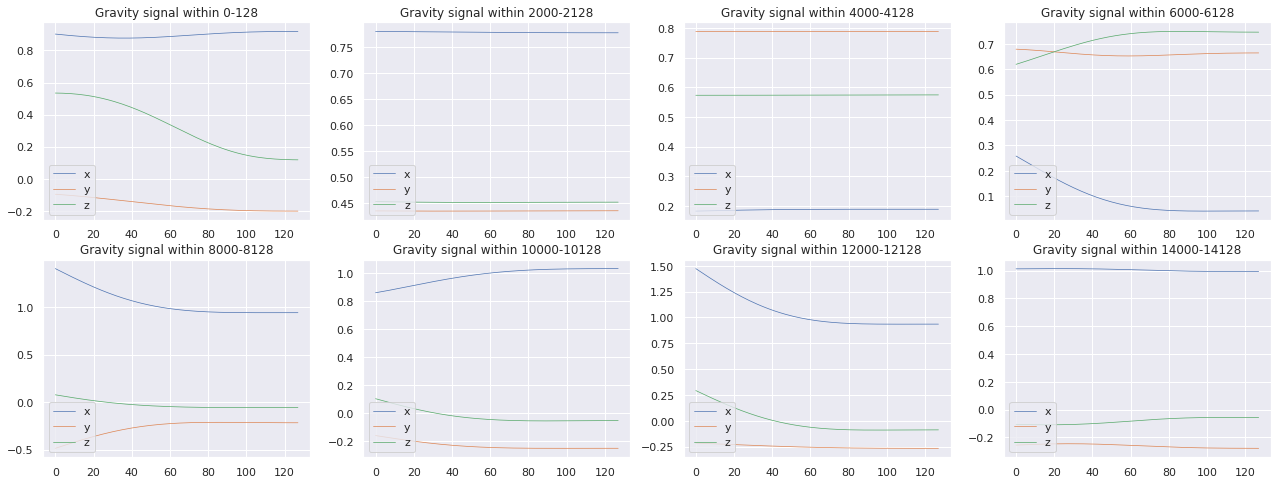

In [22]:
acc_med_but_grav = pd.DataFrame(columns=['x', 'y', 'z'])

# for axis in ['x','y','z']:   
    # acc_arr = acc_med_but[axis].values
    # acc_med_but_grav[axis] = signal.filtfilt(b, a, acc_arr)


# Plot gravity acceleration data within 128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    df = acc_med_but.iloc[i*2000:i*2000+128]    
    for axis in ['x', 'y', 'z']:
        acc_arr = df[axis].values
        arr = signal.filtfilt(b, a, acc_arr)
        
        ax[i].plot(arr, label=axis, linewidth=0.7)
    ax[i].set_title(f"Gravity signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

### 3.3 Derive body linear acceleration and angular velocity to obtain Jerk signals
* The body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). 

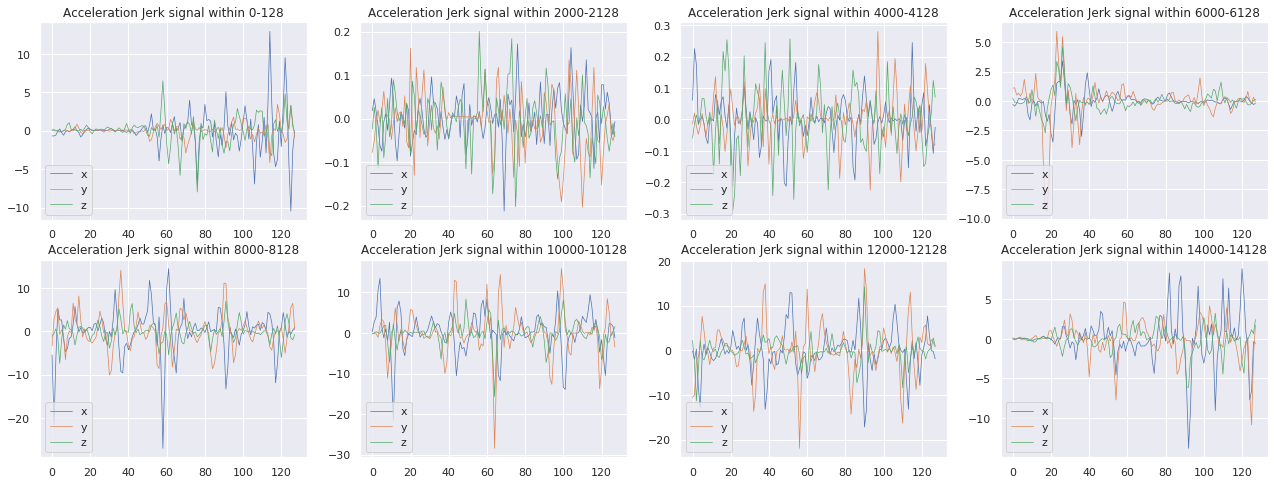

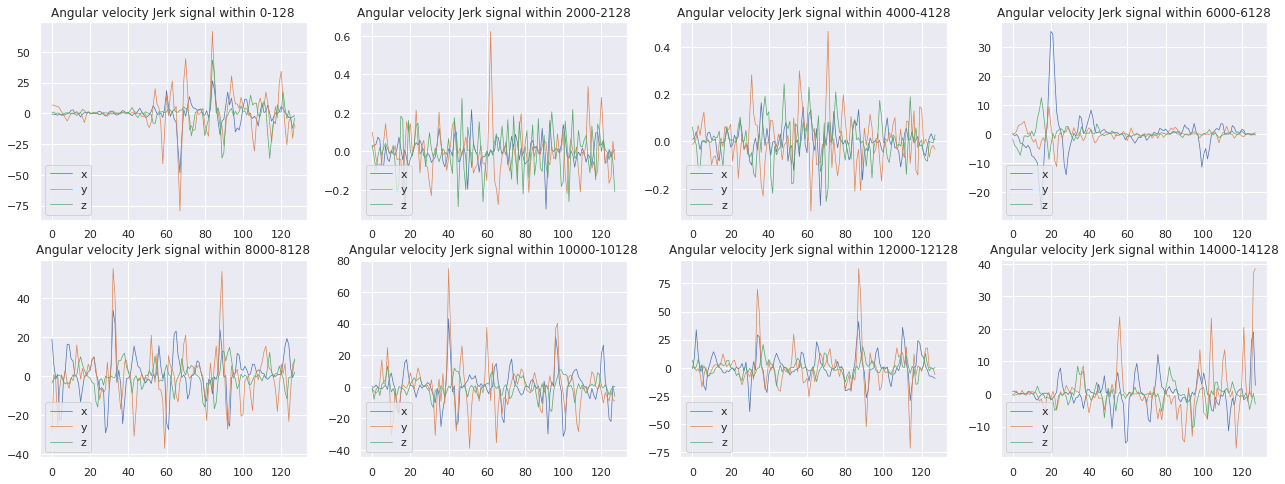

In [15]:
# Calculate Jerk signals.
acc_med_but_body_jerk = acc_med_but_body.diff(periods=1)  # Calculate difference 
acc_med_but_body_jerk.iloc[0] = acc_med_but_body_jerk.iloc[1]  # Fillna
acc_med_but_body_jerk = acc_med_but_body_jerk / 0.02  # Derive in time (50Hz)

gyro_med_but_jerk = gyro_med_but.diff(periods=1)  # Calculate difference 
gyro_med_but_jerk.iloc[0] = gyro_med_but_jerk.iloc[1]  # Fillna
gyro_med_but_jerk = gyro_med_but_jerk / 0.02  # Derive in time (50Hz)


# Plot acceleration Jerk signals
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_med_but_body_jerk.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Acceleration Jerk signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot angular velocity Jerk signals
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_med_but_jerk.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Angular velocity Jerk signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

### 3.4 Calculated the magnitude of three-dimensional signals
* Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

In [16]:
# Calculate the magnitude of three-dimensional signals using the Euclidean norm.
from numpy.linalg import norm

acc_med_but_body_mag = norm(acc_med_but_body, ord=2, axis=1)
acc_med_but_grav_mag = norm(acc_med_but_grav, ord=2, axis=1)
acc_med_but_body_jerk_mag = norm(acc_med_but_body_jerk, ord=2, axis=1)
gyro_med_but_mag = norm(gyro_med_but, ord=2, axis=1)
gyro_med_but_body_mag = norm(gyro_med_but_jerk, ord=2, axis=1)

print(acc_med_but_body_mag.shape)
print(acc_med_but_grav_mag.shape)
print(acc_med_but_body_jerk_mag.shape)
print(gyro_med_but_mag.shape)
print(gyro_med_but_body_mag.shape)

(20598,)
(20598,)
(20598,)
(20598,)
(20598,)


### 3.5 Apply FFT
* Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

In [30]:
N =128
dt = 0.02  # 50Hz
t = np.arange(0, N*dt, dt)  # time axis
freq = np.linspace(0, 1.0 / dt, N)  # frequency axis
win = np.hamming(N)  # hamming window

In [31]:
F = np.fft.fft(acc_med_but_body.iloc[128:128+128], axis=0)

In [34]:
pd.DataFrame(F).head()

,0,1,2
0,0.003651+0.000000j,1.024912+0.000000j,2.585945+0.000000j
1,0.476755+0.562717j,1.414585+0.196174j,-1.166383-1.855863j
2,1.302048+0.047817j,1.799866-1.013916j,0.276845+1.055704j
3,1.226900-0.543895j,0.206272-1.939800j,0.911621-0.013780j
4,1.299580-1.336416j,-0.526378-1.323284j,0.165987+0.045149j


In [35]:
Fx = np.fft.fft(acc_med_but_body.iloc[128:128+128]['x'], axis=0)

In [36]:
pd.DataFrame(Fx).head()

,0
0,0.003651+0.000000j
1,0.476755+0.562717j
2,1.302048+0.047817j
3,1.226900-0.543895j
4,1.299580-1.336416j


In [40]:
pd.DataFrame(Fx).tail()

,0
123,-0.032844+0.697270j
124,1.299580+1.336416j
125,1.226900+0.543895j
126,1.302048-0.047817j
127,0.476755-0.562717j


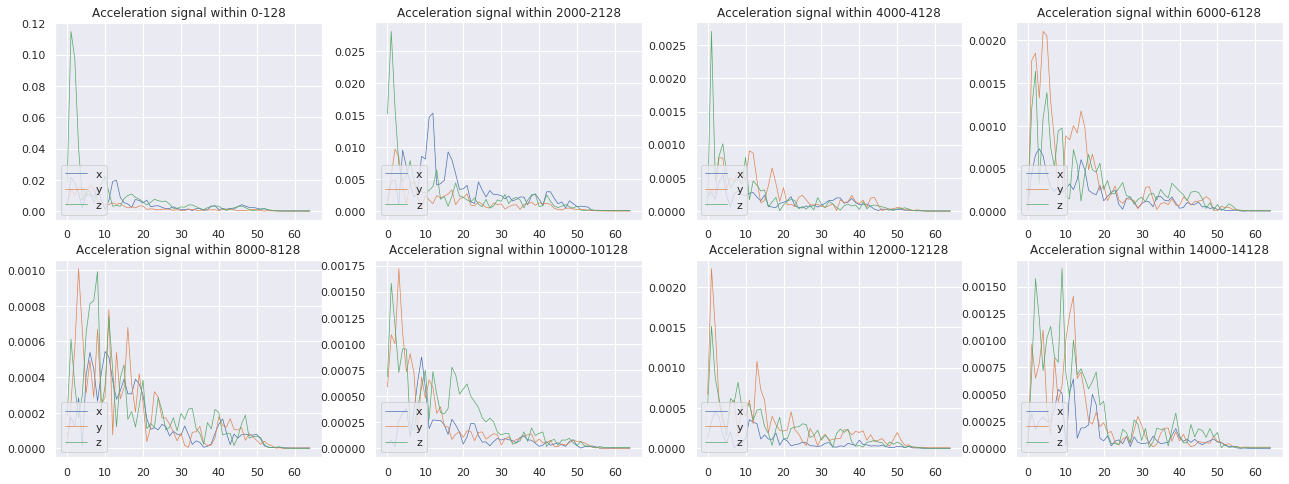

In [19]:
# Plot with hamming
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    # df = acc_med_but_body.iloc[i*128:i*128+128]
    df = pd.DataFrame(columns=list('xyz'))
    
    for axis in ['x', 'y', 'z']:
        df[axis] = acc_med_but_body.iloc[i*128:i*128+128][axis] * win
    
    F = np.fft.fft(df, axis=0)
    F = pd.DataFrame(F, columns=['x', 'y', 'z'])
    
    F = F[:N//2+1]

    # 振幅スペクトルを計算
    Amp = np.abs(F)
    Amp = pd.DataFrame(Amp, columns=['x', 'y', 'z'])
    
    Amp = Amp / N * 2
    Amp.iloc[0] = Amp.iloc[0] / 2
        
    for axis in ['x', 'y', 'z']:
        ax[i].plot(Amp[axis].values, label=axis, linewidth=0.7)
        
    ax[i].set_title(f"Acceleration signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

In [64]:
def obtain_jerk_signal(sensor_signal):
        """
        Derive signal to obtain Jerk signals
        Args:
            sensor_signal (DataFrame)
        Returns:
            jerk_signal (DataFrame):
        """
        jerk_signal = sensor_signal.diff(periods=1)  # Calculate difference 
        jerk_signal.iloc[0] = jerk_signal.iloc[1]  # Fillna
        jerk_signal = jerk_signal / (1 / 50)  # Derive in time (1 / sampling frequency)
        return jerk_signal

In [67]:
jerk = obtain_jerk_signal(bw_body)

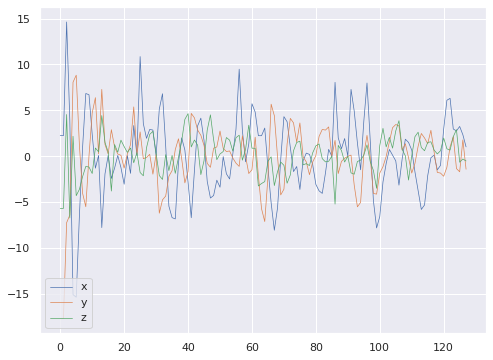

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(jerk[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')

In [71]:
def obtain_amplitude_spectrum(sensor_signal):
        """
        Obtain amplitude spectrum using Fast Fourier Transform (FFT).
        Args:
            sensor_signal (DataFrame): Time domain signals
        Returns:
            amp (array): Amplitude spectrum
        """
        N = len(sensor_signal)
        # dim = sensor_signal.shape[1]
        win = np.hamming(N)  # hamming window
        
        if len(sensor_signal.shape) == 1:
            sensor_signal = sensor_signal * win  # Apply hamming window
            F = np.fft.fft(sensor_signal, axis=0)  # Apply FFT
            F = F[:N//2]  # Remove the overlapping part

            amp = np.abs(F)  # Obtain the amplitude spectrum
            amp = amp / N * 2
            amp[0] = amp[0] / 2
        
        else:
            df = pd.DataFrame(columns=['x', 'y', 'z'])
            for axis in ['x', 'y', 'z']:
                df[axis] = sensor_signal[axis] * win  # Apply hamming window

            F = np.fft.fft(df, axis=0)  # Apply FFT
            F = pd.DataFrame(F, columns=['x', 'y', 'z'])  # Convert array to DataFrame
            F = F[:N//2]  # Remove the overlapping part

            amp = np.abs(F)  # Obtain the amplitude spectrum
            amp = pd.DataFrame(amp, columns=['x', 'y', 'z'])  # Convert array to DataFrame

            amp = amp / N * 2
            amp.iloc[0] = amp.iloc[0] / 2
        
        return amp

In [72]:
fft_df = obtain_amplitude_spectrum(bw_body)

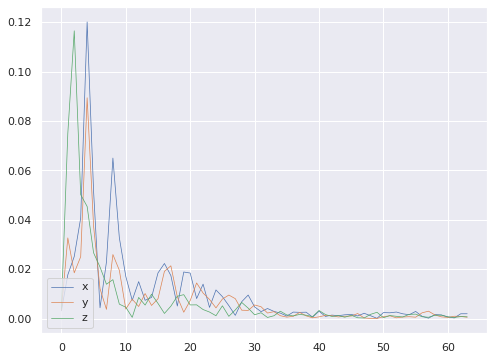

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
for axis in ['x', 'y', 'z']:
    ax.plot(fft_df[axis].values, label=axis, linewidth=0.7)
ax.legend(loc='lower left')